In [1]:
import pandas as pd
import numpy as np

# library untuk menyembunyikan pesan warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank.csv')

dataset = df.copy()
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# ukuran dataset
dataset.shape

(11162, 17)

In [4]:
#Checking if there is any null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
# jumlah missing value pada tiap kolom
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
#splitting coloums to a numeric and categorical type
categorical_columns = [x for x in df.columns if df[x].dtype == np.dtype("object")]
numerical_columns = [x for x in df.columns if x not in(categorical_columns)]

In [7]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [8]:
#Let's get the unique values of categorical features.
def get_uniqes(df, col):
    index_list  = pd.DataFrame(df[col].value_counts().index, columns = [col])
    values_list = pd.DataFrame(df[col].value_counts().values, columns = ['counts'])
    unique_data = pd.concat([index_list, values_list], axis = 1)
    unique_data['percentage'] = round(unique_data['counts'] / sum(unique_data['counts']) * 100, 2)
    unique_data.sort_values(by='percentage', ascending = False)
    print('\n- {} Feature :\n'.format(col.upper()))
    for unit in range(unique_data.shape[0]):
        #print('    {} : %{}'.format( unique_data[col][unit], unique_data.percentage[unit]))
        print(f'{unique_data[col][unit]:10} : {unique_data.percentage[unit]}')

for categ in categorical_columns:
    get_uniqes(df, categ)


- JOB Feature :

management : 22.99
blue-collar : 17.42
technician : 16.33
admin.     : 11.95
services   : 8.27
retired    : 6.97
self-employed : 3.63
student    : 3.23
unemployed : 3.2
entrepreneur : 2.94
housemaid  : 2.45
unknown    : 0.63

- MARITAL Feature :

married    : 56.9
single     : 31.52
divorced   : 11.58

- EDUCATION Feature :

secondary  : 49.06
tertiary   : 33.05
primary    : 13.44
unknown    : 4.45

- DEFAULT Feature :

no         : 98.49
yes        : 1.51

- HOUSING Feature :

no         : 52.69
yes        : 47.31

- LOAN Feature :

no         : 86.92
yes        : 13.08

- CONTACT Feature :

cellular   : 72.05
unknown    : 21.02
telephone  : 6.93

- MONTH Feature :

may        : 25.3
aug        : 13.61
jul        : 13.56
jun        : 10.95
nov        : 8.45
apr        : 8.27
feb        : 6.95
oct        : 3.51
jan        : 3.08
sep        : 2.86
mar        : 2.47
dec        : 0.99

- POUTCOME Feature :

unknown    : 74.59
failure    : 11.0
success    : 9.6
other     

In [9]:
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [10]:
# numerical columns
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


jumlah nasabah yang memiliki rekening deposit :  5289
jumlah nasabah yang tidak memiliki rekening deposit :  5873


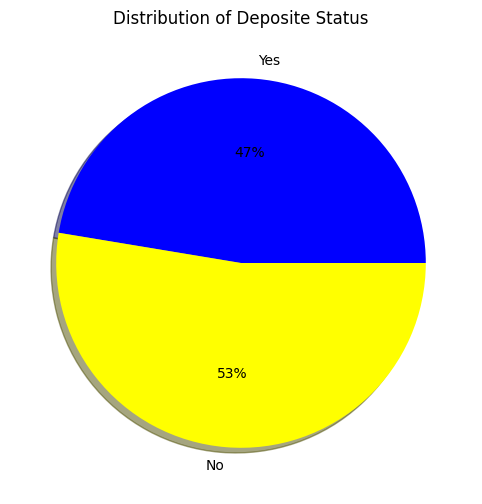

In [11]:
import matplotlib.pyplot as plt
#distribusi dari status deposit

#menghitung jumlah nasabah yang mempunyai rekening deposit dan nasabah yang tidak mempunyai rekening deposit
deposit_counts = len(dataset[dataset["deposit"]=="yes"])
nodeposit_counts = len(dataset[dataset["deposit"]=="no"])

#mencetak jumlah nasabah yang mempunyai rekening deposit dan nasabah yang tidak mempunyai rekening deposit
print("jumlah nasabah yang memiliki rekening deposit : ", deposit_counts)
print("jumlah nasabah yang tidak memiliki rekening deposit : ", nodeposit_counts)

#membuat pie chart
labels = ["Yes", "No"]
sizes = [deposit_counts, nodeposit_counts]
colors = ["blue", "yellow"]
plt.figure(figsize=(9,6))
plt.pie(sizes, labels=labels,  autopct='%0.f%%', colors=colors, shadow = True)
plt.title('Distribution of Deposite Status')

#menampilkan plot
plt.show()

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [13]:
# meringkas dataset menggunakan descriptive statistics
dataset.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [14]:
kolom_numerik = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
dataset = dataset[(np.abs(stats.zscore(dataset[kolom_numerik])) < 3).all(axis=1)]
dataset.shape

(10098, 17)

In [15]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes


In [16]:
print(dataset['job'].unique())
print(dataset['marital'].unique())
print(dataset['education'].unique())
print(dataset['default'].unique())
print(dataset['housing'].unique())
print(dataset['loan'].unique())
print(dataset['contact'].unique())
print(dataset['month'].unique())
print(dataset['poutcome'].unique())
print(dataset['deposit'].unique())

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
['married' 'single' 'divorced']
['secondary' 'tertiary' 'primary' 'unknown']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'other' 'failure' 'success']
['yes' 'no']


In [17]:
dataset['job'] = dataset['job'].map({'admin.':0, 'technician':1, 'services':2, 'management':3, 'retired':4, 'blue-collar':5, 'unemployed':6, 'entrepreneur':7, 'housemaid':8, 'unknown':9, 'self-employed':10, 'student':11})
dataset['marital'] = dataset['marital'].map({'married':0, 'single':1, 'divorced':2})
dataset['education'] = dataset['education'].map({'secondary':0, 'tertiary':1, 'primary':2, 'unknown':3})
dataset['default'] = dataset['default'].map({'no':0, 'yes':1})
dataset['housing'] = dataset['housing'].map({'yes':0, 'no':1})
dataset['loan'] = dataset['loan'].map({'no':0, 'yes':1})
dataset['contact'] = dataset['contact'].map({'unknown':0, 'cellular':1, 'telephone':2})
dataset['month'] = dataset['month'].map({'may':0, 'jun':1, 'jul':2, 'aug':3, 'oct':4, 'nov':5, 'dec':6, 'jan':7, 'feb':8, 'mar':9, 'apr':10, 'sep':11})
dataset['poutcome'] = dataset['poutcome'].map({'unknown':0, 'other':1, 'failure':2, 'success':3})
dataset['deposit'] = dataset['deposit'].map({'yes':0, 'no':1})

In [18]:
print(dataset['job'].unique())
print(dataset['marital'].unique())
print(dataset['education'].unique())
print(dataset['default'].unique())
print(dataset['housing'].unique())
print(dataset['loan'].unique())
print(dataset['contact'].unique())
print(dataset['month'].unique())
print(dataset['poutcome'].unique())
print(dataset['deposit'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[0 1 2]
[0 1 2 3]
[0 1]
[0 1]
[0 1]
[0 1 2]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[0 1 2 3]
[0 1]


In [19]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,0,0,0,2343,0,0,0,5,0,1042,1,-1,0,0,0
2,41,1,0,0,0,1270,0,0,0,5,0,1389,1,-1,0,0,0
3,55,2,0,0,0,2476,0,0,0,5,0,579,1,-1,0,0,0
4,54,0,0,1,0,184,1,0,0,5,0,673,2,-1,0,0,0
5,42,3,1,1,0,0,0,1,0,5,0,562,2,-1,0,0,0


In [20]:
X = dataset.drop(labels='deposit', axis=1).values
y = dataset['deposit'].values

In [21]:
np.unique(y, return_counts=True)

(array([0, 1]), array([4605, 5493]))

In [22]:
from imblearn.over_sampling import SMOTENC

In [23]:
sm = SMOTENC(random_state=42, categorical_features=[1])
X_res, y_res = sm.fit_resample(X, y)

In [24]:
np.unique(y_res, return_counts=True)

(array([0, 1]), array([5493, 5493]))

In [25]:
# ukuran feature dan label setelah dilakukan oversampling
print(X_res.shape)
print(y_res.shape)

(10986, 16)
(10986,)


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

print('Train set size : ', X_train.shape, y_train.shape)
print('Test set size  : ', X_test.shape, y_test.shape)

Train set size :  (8788, 16) (8788,)
Test set size  :  (2198, 16) (2198,)


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)

# Standardization Feature
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
# training model Decision Tree
hyperparameters = {'max_depth': list(range(2, 11)),
                   'max_leaf_nodes': list(range(2, 11))}

model_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), hyperparameters, cv=8, refit=True)

model_dt.fit(X_train, y_train)
print('Setting model Decision Tree terbaik :', model_dt.best_params_)

Setting model Decision Tree terbaik : {'max_depth': 5, 'max_leaf_nodes': 10}


In [33]:
y_pred = model_dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1099
           1       0.82      0.78      0.80      1099

    accuracy                           0.80      2198
   macro avg       0.80      0.80      0.80      2198
weighted avg       0.80      0.80      0.80      2198



In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
# training model k-NN
hyperparameters = {'n_neighbors': list(range(2, 21))}

model_knn = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=8, refit=True)

model_knn.fit(X_train_scaled, y_train)
print('Setting model k-NN terbaik :', model_knn.best_params_)

Setting model k-NN terbaik : {'n_neighbors': 18}


In [36]:
y_pred = model_knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1099
           1       0.80      0.80      0.80      1099

    accuracy                           0.80      2198
   macro avg       0.80      0.80      0.80      2198
weighted avg       0.80      0.80      0.80      2198



In [37]:
from sklearn.svm import SVC

In [ ]:
hyperparameters = {'C': [0.1, 1, 10, 100, 1000],
                   'kernel': ['rbf', 'sigmoid'],
                   'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

model_svm = GridSearchCV(SVC(), hyperparameters, cv=8, refit=True)
model_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=8, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']})

In [ ]:
print('Setting model SVM terbaik :', model_svm.best_params_)

Setting model SVM terbaik : {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
y_pred = model_svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1099
           1       0.85      0.80      0.82      1099

    accuracy                           0.83      2198
   macro avg       0.83      0.83      0.83      2198
weighted avg       0.83      0.83      0.83      2198



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
y_pred = model_nb.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1099
           1       0.75      0.74      0.74      1099

    accuracy                           0.74      2198
   macro avg       0.74      0.74      0.74      2198
weighted avg       0.74      0.74      0.74      2198



In [ ]:
best_model = SVC(C=100, gamma=0.01, kernel='rbf')
best_model.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.01)

In [ ]:
# input data baru
umur = 36#@param {type:"number"}
job = 0#@param [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]{type:"raw"}
marital = 1#@param [0, 1, 2]{type:"raw"}
education = 0#@param [0, 1, 2, 3]{type:"raw"}
default = 0#@param [0, 1]{type:"raw"}
balance = 0#@param {type:"number"}
housing = 0#@param [0, 1]{type:"raw"}
loan = 0#@param [0, 1]{type:"raw"}
contact = 1#@param [0, 1, 2]{type:"raw"}
day = 21#@param {type:"number"}
month = 5#@param [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]{type:"raw"}
duration = 139#@param {type:"number"}
campaign = 2#@param {type:"number"}
pdays = -1#@param {type:"number"}
previous = 0#@param {type:"number"}
poutcome = 0#@param [0, 1]{type:"raw"}

# data baru yang diinput harus di-standardization terlebih dahulu
data_baru = [[umur, job, marital, education, default, balance, housing, loan,
              contact, day, month, duration, campaign, pdays, previous,
              poutcome]]
data_baru = scaler.transform(data_baru)

# prediksi data baru, yang sudah di-standardization, menggunakan model SVM terbaik
hasil_prediksi = best_model.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)

print('Hasil Prediksi Calon Nasabah adalah ', end='')
if hasil_prediksi == 0:
  print('Calon Nasabah BERMINAT Membuka Tabungan Berjangka')
elif hasil_prediksi == 1:
  print('Calon Nasabah TIDAK BERMINAT Membuka Tabungan Berjangka')

Hasil Prediksi Calon Nasabah adalah Calon Nasabah TIDAK BERMINAT Membuka Tabungan Berjangka


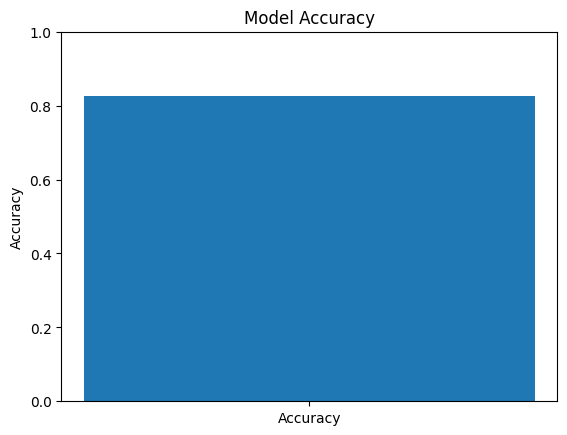

In [ ]:
# Plot Akurasi diagram batang
from sklearn.metrics import accuracy_score
y_pred = model_svm.predict(X_test_scaled)
Accuracy = accuracy_score(y_test, y_pred)
plt.bar(['Accuracy'], [Accuracy])
plt.ylim(0, 1)  # Rentang sumbu y dari 0 hingga 1 (karena akurasi adalah nilai antara 0 dan 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [ ]:
# plot akurasi diagram garis

accuracies = []
for i in range (1,11) :
  model_svm.fit(X_train_scaled, y_train)
  from sklearn.metrics import accuracy_score
  y_pred = model_svm.predict(X_test_scaled)
  Accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(Accuracy)

# Plot akurasi dalam bentuk diagram garis
plt.plot(range(1, 11), accuracies, marker='o')  # Misalnya, untuk 10 iterasi
plt.xlabel('Iterasi')
plt.ylabel('Akurasi')
plt.title('Perubahan Akurasi per Iterasi')
plt.grid(True)
plt.show()

In [ ]:
import pickle

In [ ]:
# menyimpan scaler object (preprocessing StandardScaler), scaler object dibutuhkan untuk men-standardization data baru
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# menyimpan model terbaik
pickle.dump(best_model, open('model.pkl', 'wb'))